In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# 測定に使用したデータ


In [2]:
HV_original_data_left = {
    "HV_D1_L": [
        4.5,
        29.6,
        18.0,
        12.8,
        14.3,
        15.7,
        6.1,
        11.5,
        14.2,
        18.1,
        12.5,
        16.8,
        17.8,
        5.5,
    ],
    "HV_D2_L": [
        2.4,
        29.5,
        15.3,
        9.8,
        13.1,
        16.0,
        6.9,
        11.5,
        13.7,
        18.1,
        14.2,
        13.0,
        18.2,
        7.6,
    ],
    "SegPCA_L": [
        0.2,
        26.3,
        16.5,
        9.1,
        11.9,
        12.2,
        6.6,
        11.2,
        10.6,
        17.6,
        13.7,
        12.9,
        18.9,
        10.3,
    ],
}

HV_original_data_right = {
    "HV_D1_R": [
        4.2,
        29.5,
        20.1,
        11.5,
        9.2,
        18.9,
        9.5,
        9.7,
        15.0,
        22.3,
        13.0,
        18.8,
        12.0,
        8.7,
    ],
    "HV_D2_R": [
        4.1,
        28.0,
        17.2,
        8.4,
        5.7,
        16.3,
        6.7,
        10.9,
        14.9,
        19.8,
        11.7,
        15.7,
        10.5,
        12.1,
    ],
    "SegPCA_R": [
        1.3,
        25.8,
        18.4,
        7,
        5.1,
        14.9,
        7.2,
        9.9,
        11.6,
        20.2,
        11.4,
        14.7,
        12.7,
        9,
    ],
}

M1M5_original_data_left = {
    "M1M5_D1_L": [
        26.15,
        40.781,
        26.377,
        29.49,
        30.639,
        28.259,
        29.585,
        29.675,
        28.217,
        32.251,
        30.488,
        34.87,
        35.212,
        26.634,
    ],
    "M1M5_D2_L": [
        21.408,
        40.608,
        23.794,
        24.54,
        28.133,
        25.809,
        31.521,
        29.829,
        28.185,
        31.023,
        29.117,
        31.558,
        33.517,
        29.081,
    ],
    "SegPCA_L": [
        21.1,
        36.80,
        24.0,
        20.0,
        25.60,
        23.20,
        29.20,
        27.70,
        25.50,
        28.90,
        26.60,
        29.90,
        29.60,
        17.80,
    ],
}

M1M5_original_data_right = {
    "M1M5_D1_R": [
        26.528,
        37.671,
        28.924,
        28.528,
        30.256,
        27.926,
        27.401,
        29.616,
        28.212,
        31.25,
        30.84,
        32.828,
        36.327,
        27.336,
    ],
    "M1M5_D2_R": [
        24.026,
        38.249,
        28.655,
        26.294,
        28.776,
        26.976,
        31.316,
        31.039,
        29.267,
        30.403,
        29.526,
        30.189,
        34.146,
        28.129,
    ],
    "SegPCA_R": [
        22.50,
        34.10,
        26.50,
        22.80,
        26.10,
        23.30,
        30.70,
        27.90,
        26.50,
        30.30,
        27.0,
        28.60,
        33.30,
        23.70,
    ],
}

# 測定に使用した関数


In [3]:
def calculate_slope(vector):
    x, y = vector

    if x != 0:
        slope = y / x
    else:
        slope = math.inf if y > 0 else -math.inf

    return slope


from sklearn.decomposition import PCA

In [4]:
def process_pca(data1, data2, x_label, y_label, title, save_path, mode):
    data = np.array([data1, data2]).T
    pca = PCA(n_components=2)
    # 今回は正規化せずにPCAを行う
    pca.fit(data)

    # plt.scatter(data_mean[0], data_mean[1], c='red', marker='x', s=100, label='Centroid')

    # for i, (x, y) in enumerate(zip(data1, data2)):
    #     plt.annotate(str(i + 1), (x + 0.3, y + 0.3), fontsize=10)

    # 主成分軸方向の単位ベクトル
    loadings = pca.components_
    print(f"主成分軸方向の単位ベクトル : {loadings}")
    # 第一主成分軸を描画
    mean_d1, mean_d2 = np.mean(data1), np.mean(data2)
    plt.plot(
        [mean_d1 - loadings[0, 0] * 40, mean_d1 + loadings[0, 0] * 40],
        [mean_d2 - loadings[0, 1] * 40, mean_d2 + loadings[0, 1] * 40],
        color="orange",
    )

    # 第一主成分軸の傾きと切片を求める
    data_mean = pca.mean_
    slope = calculate_slope(loadings[0])
    intercept = data_mean[1] - slope * data_mean[0]
    print(f"第1主成分軸の傾き : {slope}")
    print(f"第1主成分軸の切片 : {intercept}")

    # 固有値を取得
    eigenvalues = pca.explained_variance_
    print(f"第1主成分軸の分散（固有値） : {eigenvalues[0]}")
    print(f"第2主成分軸の分散（固有値） : {eigenvalues[1]}")

    # 第一主成分軸と第二主成分軸の分散の比率（寄与率）
    # 寄与率 : 各固有値を固有値の合計で割ったもの
    print(f"第1主成分軸の寄与率 : {pca.explained_variance_ratio_[0]}")
    print(f"第2主成分軸の寄与率 : {pca.explained_variance_ratio_[1]}")

    # 固有値から各主成分軸の標準偏差を計算
    print(f"第1主成分軸の分散の平方根(標準偏差) : {np.sqrt(eigenvalues[0])}")
    print(f"第2主成分軸の分散の平方根(標準偏差) : { np.sqrt(eigenvalues[1])}")

    # 相関係数とその二乗を計算
    correlation, _ = pearsonr(data1, data2)
    squared_correlation = correlation**2
    print(f"相関係数rの二乗 : {squared_correlation}")

    # data1 を NumPy の配列に変換
    data1_np = np.array(data1).reshape(-1, 1)  # data1 を NumPy の配列に変換
    data2_np = np.array(data2)
    model = LinearRegression().fit(data1_np, data2_np)
    R2 = model.score(data1_np, data2_np)
    print(f"寄与率R2: {R2}")

    plt.scatter(data1, data2, c="blue", marker="o")
    if mode == "HV":
        min_plt = 0
        max_plt = 35
    else:
        min_plt = 15
        max_plt = 40
    plt.xlim(min_plt, max_plt)
    plt.ylim(min_plt, max_plt)

    plt.plot([0, 45], [0, 45], linestyle="--", color="black")
    plt.tick_params(axis="both", which="major", labelsize=16)

    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

主成分軸方向の単位ベクトル : [[ 0.70959893  0.70460582]
 [ 0.70460582 -0.70959893]]
第1主成分軸の傾き : 0.9929634857575842
第1主成分軸の切片 : -0.4793565777533697
第1主成分軸の分散（固有値） : 80.3818892667176
第2主成分軸の分散（固有値） : 1.5506931508648523
第1主成分軸の寄与率 : 0.9810735472371479
第2主成分軸の寄与率 : 0.018926452762851997
第1主成分軸の分散の平方根(標準偏差) : 8.965594752536923
第2主成分軸の分散の平方根(標準偏差) : 1.2452683047700412
相関係数rの二乗 : 0.9257236029428833
寄与率R2: 0.925723602942883


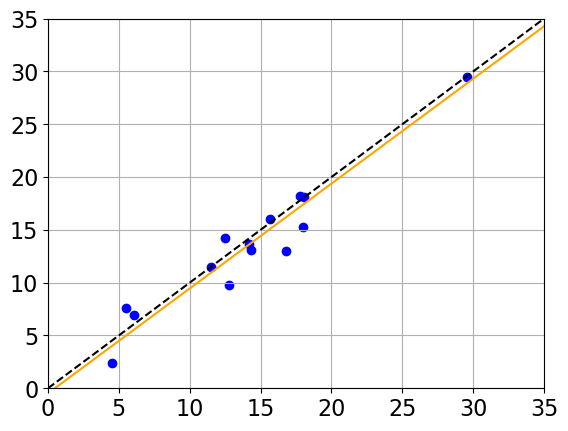

主成分軸方向の単位ベクトル : [[ 0.72719629  0.68642957]
 [-0.68642957  0.72719629]]
第1主成分軸の傾き : 0.9439398752097407
第1主成分軸の切片 : -0.595266526171633
第1主成分軸の分散（固有値） : 74.93237731565841
第2主成分軸の分散（固有値） : 3.436633673352602
第1主成分軸の寄与率 : 0.9561480535484301
第2主成分軸の寄与率 : 0.043851946451569875
第1主成分軸の分散の平方根(標準偏差) : 8.65634895990558
第2主成分軸の分散の平方根(標準偏差) : 1.8538159761294006
相関係数rの二乗 : 0.8318193206467682
寄与率R2: 0.8318193206467682


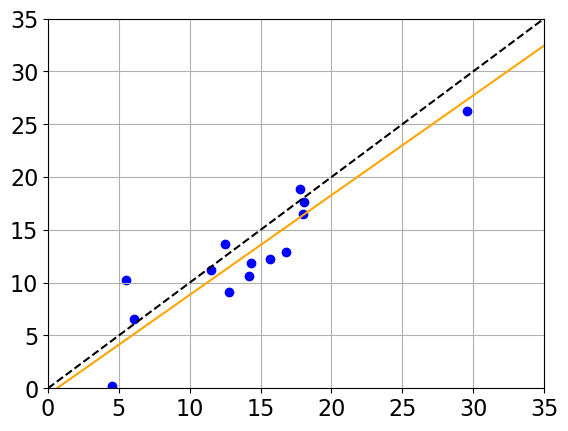

主成分軸方向の単位ベクトル : [[ 0.72378139  0.69002935]
 [-0.69002935  0.72378139]]
第1主成分軸の傾き : 0.9533670821942023
第1主成分軸の切片 : -0.1765991899544641
第1主成分軸の分散（固有値） : 76.24531146479453
第2主成分軸の分散（固有値） : 1.56705117256812
第1主成分軸の寄与率 : 0.9798611541989644
第2主成分軸の寄与率 : 0.02013884580103573
第1主成分軸の分散の平方根(標準偏差) : 8.731856129414554
第2主成分軸の分散の平方根(標準偏差) : 1.2518191453113825
相関係数rの二乗 : 0.9209010098917856
寄与率R2: 0.9209010098917856


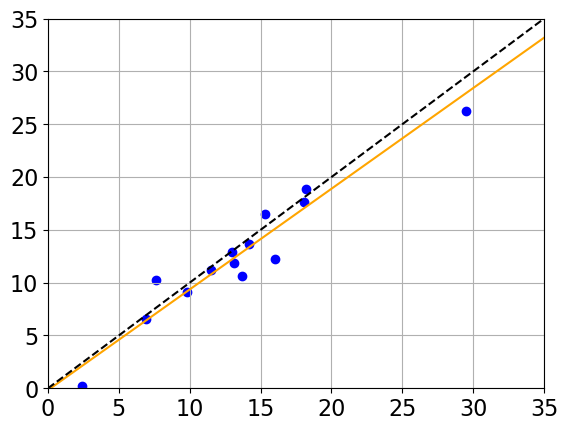

In [5]:
HV_D1_L = HV_original_data_left["HV_D1_L"]
HV_D2_L = HV_original_data_left["HV_D2_L"]
SegPCA_L = HV_original_data_left["SegPCA_L"]
process_pca(
    HV_D1_L,
    HV_D2_L,
    x_label="D1",
    y_label="D2",
    title="HV_Left",
    save_path="assets/HV_D1_D2_L.png",
    mode="HV",
)
process_pca(
    HV_D1_L,
    SegPCA_L,
    x_label="D1",
    y_label="SegPCA",
    title="HV_Left",
    save_path="assets/HV_D1_SegPCA_L.png",
    mode="HV",
)
process_pca(
    HV_D2_L,
    SegPCA_L,
    x_label="D2",
    y_label="SegPCA",
    title="HV_Left",
    save_path="assets/HV_D2_SegPCA_L.png",
    mode="HV",
)
# 相関係数の二乗が寄与率になると思う

主成分軸方向の単位ベクトル : [[ 0.73059432  0.68281178]
 [-0.68281178  0.73059432]]
第1主成分軸の傾き : 0.9345977122513707
第1主成分軸の切片 : -0.5116126399769598
第1主成分軸の分散（固有値） : 83.2242275569661
第2主成分軸の分散（固有値） : 1.838409805671271
第1主成分軸の寄与率 : 0.9783875757598038
第2主成分軸の寄与率 : 0.02161242424019606
第1主成分軸の分散の平方根(標準偏差) : 9.122731364945814
第2主成分軸の分散の平方根(標準偏差) : 1.3558797165203376
相関係数rの二乗 : 0.9150640538457613
寄与率R2: 0.9150640538457616


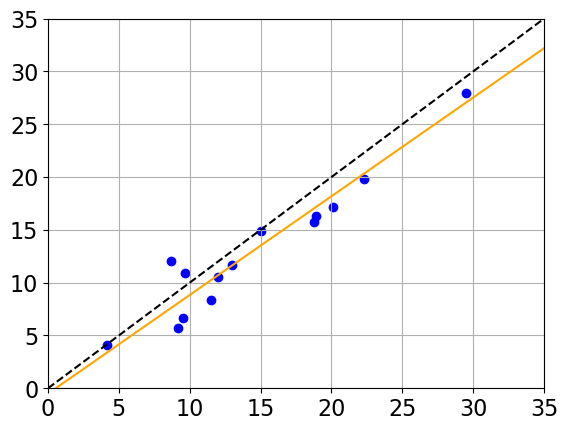

主成分軸方向の単位ベクトル : [[ 0.72312032  0.69072209]
 [-0.69072209  0.72312032]]
第1主成分軸の傾き : 0.9551966255065263
第1主成分軸の切片 : -1.723699785894354
第1主成分軸の分散（固有値） : 85.20908865230041
第2主成分軸の分散（固有値） : 1.516405853194107
第1主成分軸の寄与率 : 0.9825148779855267
第2主成分軸の寄与率 : 0.01748512201447332
第1主成分軸の分散の平方根(標準偏差) : 9.23087691675609
第2主成分軸の分散の平方根(標準偏差) : 1.2314243189064065
相関係数rの二乗 : 0.9311478924455543
寄与率R2: 0.9311478924455546


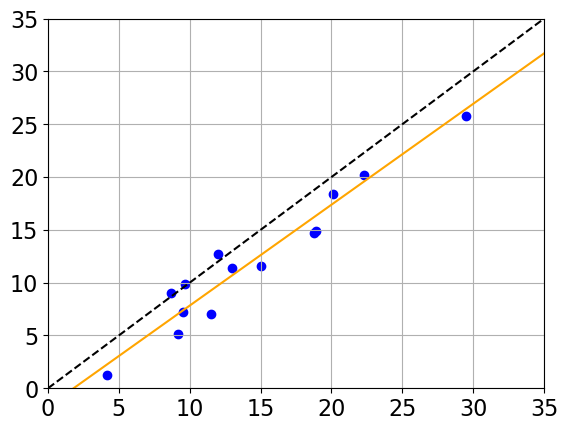

主成分軸方向の単位ベクトル : [[ 0.69958607  0.71454834]
 [-0.71454834  0.69958607]]
第1主成分軸の傾き : 1.021387319241032
第1主成分軸の切片 : -1.192320864419134
第1主成分軸の分散（固有値） : 79.90945628329072
第2主成分軸の分散（固有値） : 1.3195547057202208
第1主成分軸の寄与率 : 0.9837551302219014
第2主成分軸の寄与率 : 0.016244869778098574
第1主成分軸の分散の平方根(標準偏差) : 8.939208929390269
第2主成分軸の分散の平方根(標準偏差) : 1.148718723500327
相関係数rの二乗 : 0.9360493041856149
寄与率R2: 0.936049304185615


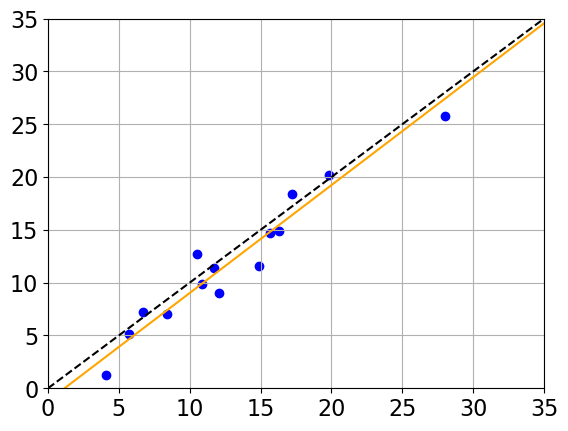

In [6]:
HV_D1_R = HV_original_data_right["HV_D1_R"]
HV_D2_R = HV_original_data_right["HV_D2_R"]
SegPCA_R = HV_original_data_right["SegPCA_R"]
process_pca(
    HV_D1_R,
    HV_D2_R,
    x_label="D1",
    y_label="D2",
    title="HV_Right",
    save_path="assets/HV_D1_D2_R.png",
    mode="HV",
)
process_pca(
    HV_D1_R,
    SegPCA_R,
    x_label="D1",
    y_label="SegPCA",
    title="HV_Right",
    save_path="assets/HV_D1_SegPCA_R.png",
    mode="HV",
)
process_pca(
    HV_D2_R,
    SegPCA_R,
    x_label="D2",
    y_label="SegPCA",
    title="HV_Right",
    save_path="assets/HV_D2_SegPCA_R.png",
    mode="HV",
)

主成分軸方向の単位ベクトル : [[ 0.64468871  0.7644452 ]
 [-0.7644452   0.64468871]]
第1主成分軸の傾き : 1.1857586403166833
第1主成分軸の切片 : -7.151882462975664
第1主成分軸の分散（固有値） : 36.46323290732012
第2主成分軸の分散（固有値） : 2.174566944328248
第1主成分軸の寄与率 : 0.9437191829587191
第2主成分軸の寄与率 : 0.056280817041280795
第1主成分軸の分散の平方根(標準偏差) : 6.0384793538870465
第2主成分軸の分散の平方根(標準偏差) : 1.4746412934433404
相関係数rの二乗 : 0.7826727665131424
寄与率R2: 0.7826727665131424


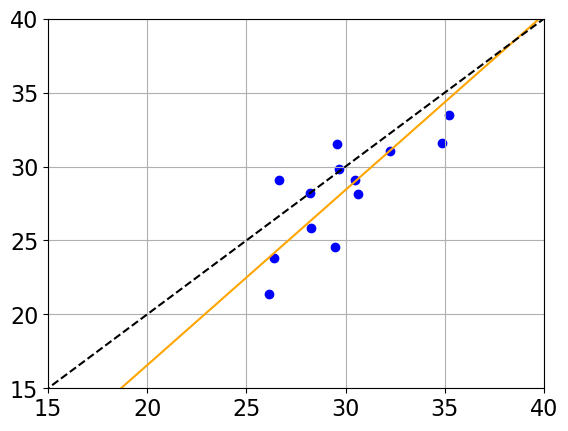

主成分軸方向の単位ベクトル : [[ 0.63034233  0.7763173 ]
 [ 0.7763173  -0.63034233]]
第1主成分軸の傾き : 1.2315804750336994
第1主成分軸の切片 : -11.57070541805317
第1主成分軸の分散（固有値） : 37.29091038108188
第2主成分軸の分散（固有値） : 2.6696131354016197
第1主成分軸の寄与率 : 0.9331937397091302
第2主成分軸の寄与率 : 0.06680626029086978
第1主成分軸の分散の平方根(標準偏差) : 6.10662839716663
第2主成分軸の分散の平方根(標準偏差) : 1.6338950809037953
相関係数rの二乗 : 0.7424769317505716
寄与率R2: 0.7424769317505718


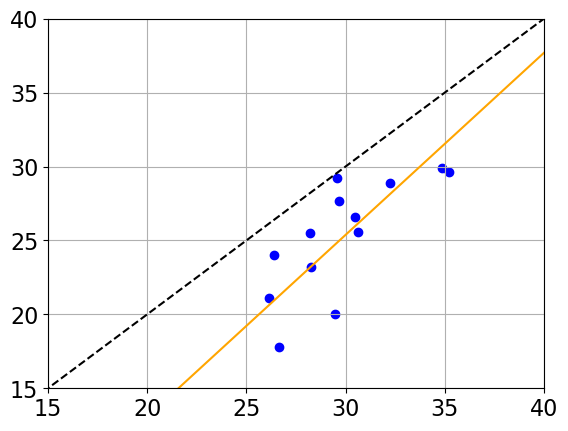

主成分軸方向の単位ベクトル : [[ 0.69485499  0.71914988]
 [ 0.71914988 -0.69485499]]
第1主成分軸の傾き : 1.034963974418703
第1主成分軸の切片 : -4.035185866548879
第1主成分軸の分散（固有値） : 42.12530308254755
第2主成分軸の分散（固有値） : 3.6215336921777226
第1主成分軸の寄与率 : 0.9208353200460281
第2主成分軸の寄与率 : 0.07916467995397199
第1主成分軸の分散の平方根(標準偏差) : 6.490400841438651
第2主成分軸の分散の平方根(標準偏差) : 1.9030327617194935
相関係数rの二乗 : 0.7081654872177111
寄与率R2: 0.708165487217711


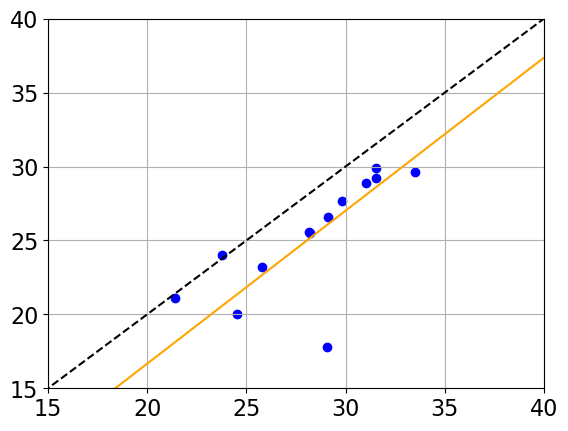

In [7]:
M1M5_D1_L = M1M5_original_data_left["M1M5_D1_L"]
M1M5_D2_L = M1M5_original_data_left["M1M5_D2_L"]
SegPCA_L = M1M5_original_data_left["SegPCA_L"]
process_pca(
    M1M5_D1_L,
    M1M5_D2_L,
    x_label="D1",
    y_label="D2",
    title="M1M5_Left",
    save_path="assets/M1M5_D1_D2_L.png",
    mode="M1M5",
)
process_pca(
    M1M5_D1_L,
    SegPCA_L,
    x_label="D1",
    y_label="SegPCA",
    title="M1M5_Left",
    save_path="assets/M1M5_D1_SegPCA_L.png",
    mode="M1M5",
)
process_pca(
    M1M5_D2_L,
    SegPCA_L,
    x_label="D2",
    y_label="SegPCA",
    title="M1M5_Left",
    save_path="assets/M1M5_D2_SegPCA_L.png",
    mode="M1M5",
)

主成分軸方向の単位ベクトル : [[ 0.69504068  0.71897041]
 [-0.71897041  0.69504068]]
第1主成分軸の傾き : 1.0344292392904364
第1主成分軸の切片 : -1.5169790157655925
第1主成分軸の分散（固有値） : 21.270725593822625
第2主成分軸の分散（固有値） : 1.7193471204630972
第1主成分軸の寄与率 : 0.9252134979375373
第2主成分軸の寄与率 : 0.07478650206246272
第1主成分軸の分散の平方根(標準偏差) : 4.612019687059306
第2主成分軸の分散の平方根(標準偏差) : 1.3112387732457798
相関係数rの二乗 : 0.7229967035491409
寄与率R2: 0.7229967035491408


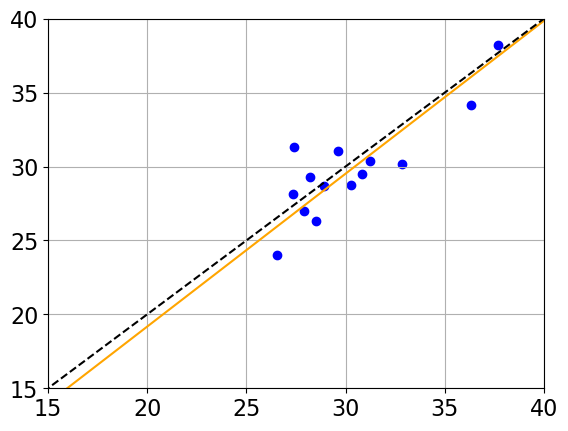

主成分軸方向の単位ベクトル : [[ 0.65910994  0.7520466 ]
 [-0.7520466   0.65910994]]
第1主成分軸の傾き : 1.1410032711342237
第1主成分軸の切片 : -7.148432056651142
第1主成分軸の分散（固有値） : 22.67136003633459
第2主成分軸の分散（固有値） : 2.3254797933357496
第1主成分軸の寄与率 : 0.9069690485204658
第2主成分軸の寄与率 : 0.09303095147953422
第1主成分軸の分散の平方根(標準偏差) : 4.761445162588202
第2主成分軸の分散の平方根(標準偏差) : 1.5249523905144546
相関係数rの二乗 : 0.6586050943926399
寄与率R2: 0.6586050943926397


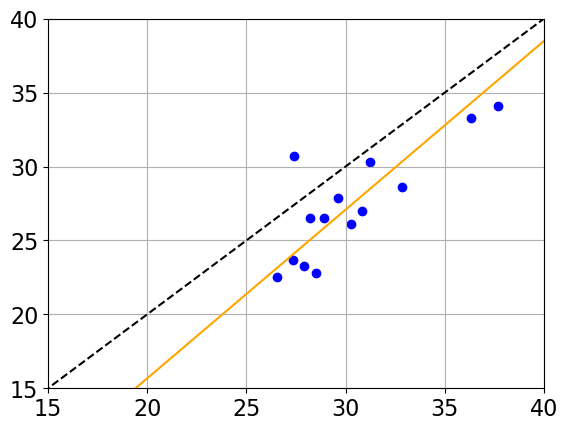

主成分軸方向の単位ベクトル : [[ 0.67685197  0.73611915]
 [ 0.73611915 -0.67685197]]
第1主成分軸の傾き : 1.0875629874355524
第1主成分軸の切片 : -5.014569835267036
第1主成分軸の分散（固有値） : 24.810925969015248
第2主成分軸の分散（固有値） : 0.8474717507649824
第1主成分軸の寄与率 : 0.966970979247404
第2主成分軸の寄与率 : 0.03302902075259597
第1主成分軸の分散の平方根(標準偏差) : 4.981056712085825
第2主成分軸の分散の平方根(標準偏差) : 0.9205822889698576
相関係数rの二乗 : 0.8714613172221203
寄与率R2: 0.8714613172221202


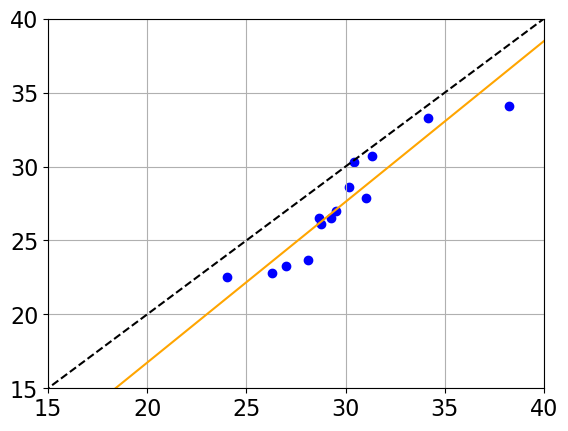

In [8]:
M1M5_D1_R = M1M5_original_data_right["M1M5_D1_R"]
M1M5_D2_R = M1M5_original_data_right["M1M5_D2_R"]
SegPCA_R = M1M5_original_data_right["SegPCA_R"]
process_pca(
    M1M5_D1_R,
    M1M5_D2_R,
    x_label="D1",
    y_label="D2",
    title="M1M5_Right",
    save_path="assets/M1M5_D1_D2_R.png",
    mode="M1M5",
)
process_pca(
    M1M5_D1_R,
    SegPCA_R,
    x_label="D1",
    y_label="SegPCA",
    title="M1M5_Right",
    save_path="assets/M1M5_D1_SegPCA_R.png",
    mode="M1M5",
)
process_pca(
    M1M5_D2_R,
    SegPCA_R,
    x_label="D2",
    y_label="SegPCA",
    title="M1M5_Right",
    save_path="assets/M1M5_D2_SegPCA_R.png",
    mode="M1M5",
)

# クラス内分散


In [9]:
def calculate_variance(data):
    return np.var(data, ddof=1)  # 標本分散を計算


# 各手法に対する分散を計算
variances = {}
for key, data in HV_original_data_left.items():
    variances[key + "_left"] = calculate_variance(data)
for key, data in HV_original_data_right.items():
    variances[key + "_right"] = calculate_variance(data)
for key, data in M1M5_original_data_left.items():
    variances[key + "_left"] = calculate_variance(data)
for key, data in M1M5_original_data_right.items():
    variances[key + "_right"] = calculate_variance(data)

# 結果の表示
for key, value in variances.items():
    print(f"Variance of {key}: {value:.2f}")

Variance of HV_D1_L_left: 41.24
Variance of HV_D2_L_left: 40.69
Variance of SegPCA_L_left: 23.53
Variance of HV_D1_R_right: 45.28
Variance of HV_D2_R_right: 39.78
Variance of SegPCA_R_right: 13.83
Variance of M1M5_D1_L_left: 16.43
Variance of M1M5_D2_L_left: 22.21
Variance of M1M5_D1_R_right: 11.16
Variance of M1M5_D2_R_right: 11.83


# 相関係数


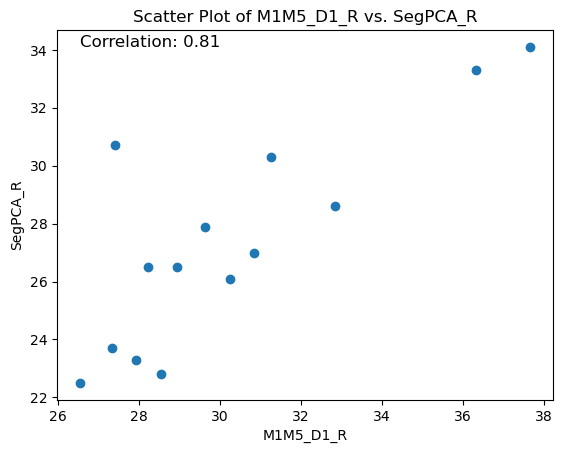

In [10]:
# 相関係数の計算
correlation_coefficient = np.corrcoef(M1M5_D1_R, SegPCA_R)[0, 1]

# データのプロット
plt.scatter(M1M5_D1_R, SegPCA_R)
plt.title("Scatter Plot of M1M5_D1_R vs. SegPCA_R")
plt.xlabel("M1M5_D1_R")
plt.ylabel("SegPCA_R")

# 相関係数の表示
plt.text(
    min(M1M5_D1_R),
    max(SegPCA_R),
    f"Correlation: {correlation_coefficient:.2f}",
    fontsize=12,
    ha="left",
)

plt.show()

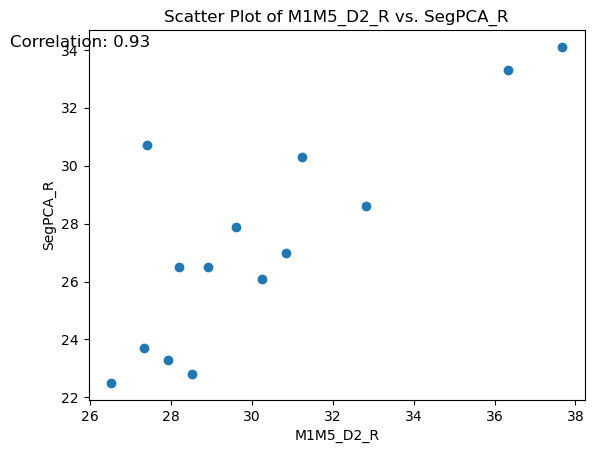

In [11]:
# 相関係数の計算
correlation_coefficient = np.corrcoef(M1M5_D2_R, SegPCA_R)[0, 1]

# データのプロット
plt.scatter(M1M5_D1_R, SegPCA_R)
plt.title("Scatter Plot of M1M5_D2_R vs. SegPCA_R")
plt.xlabel("M1M5_D2_R")
plt.ylabel("SegPCA_R")

# 相関係数の表示
plt.text(
    min(M1M5_D2_R),
    max(SegPCA_R),
    f"Correlation: {correlation_coefficient:.2f}",
    fontsize=12,
    ha="left",
)

plt.show()